In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Pre-Processing Atlantic Hurricane Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving atlantic.csv to atlantic.csv


In [ ]:
adata=pd.read_csv("atlantic.csv")
adata.head()


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
adata.tail()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0
49104,AL122015,KATE,20151113,1200,,EX,40.7N,45.4W,45,987,...,150,220,0,0,0,0,0,0,0,0


In [ ]:
adata.shape

(49105, 22)

In [ ]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [ ]:
adata.isnull().sum()

,0
ID,0
Name,0
Date,0
Time,0
Event,0
Status,0
Latitude,0
Longitude,0
Maximum Wind,0
Minimum Pressure,0


to find percentage of missing data

In [ ]:
adata.isnull().sum()/adata.shape[0]*100

,0
ID,0.0
Name,0.0
Date,0.0
Time,0.0
Event,0.0
Status,0.0
Latitude,0.0
Longitude,0.0
Maximum Wind,0.0
Minimum Pressure,0.0


to check for duplicates

In [ ]:
adata.duplicated().sum()

0

to check for garbage value

In [ ]:
for i in adata.select_dtypes(include="object").columns:
  print(adata[i].value_counts())
  print("****"*10)

ID
AL031899    133
AL141971    118
AL201969     99
AL142012     96
AL041926     95
           ... 
AL071861      1
AL051867      1
AL031855      1
AL021864      1
AL021851      1
Name: count, Length: 1814, dtype: int64
****************************************
Name
UNNAMED    26563
FRANCES      317
 ARLENE      283
 BERTHA      268
 DENNIS      255
           ...  
  SHARY        9
  TAMMY        9
SIXTEEN        8
FERNAND        7
 AMELIA        6
Name: count, Length: 288, dtype: int64
****************************************
Event
     48141
L      903
I       27
P        9
S        7
C        5
T        5
W        4
R        3
G        1
Name: count, dtype: int64
****************************************
Status
TS    17804
HU    14537
TD     9891
EX     4798
LO     1005
SS      557
SD      293
WV      116
DB      104
Name: count, dtype: int64
****************************************
Latitude
28.0N    299
18.0N    298
27.0N    290
29.0N    283
20.0N    283
        ... 
79.5N      1
80.

In [ ]:
adata.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [ ]:
adata.describe(include="object")

,ID,Name,Event,Status,Latitude,Longitude
count,49105,49105,49105,49105,49105,49105
unique,1814,288,10,9,597,1036
top,AL031899,UNNAMED,,TS,28.0N,65.0W
freq,133,26563,48141,17804,299,181


plotting histograms,boxplot and scatter plots of atlantic hurricane data to analyze the data info

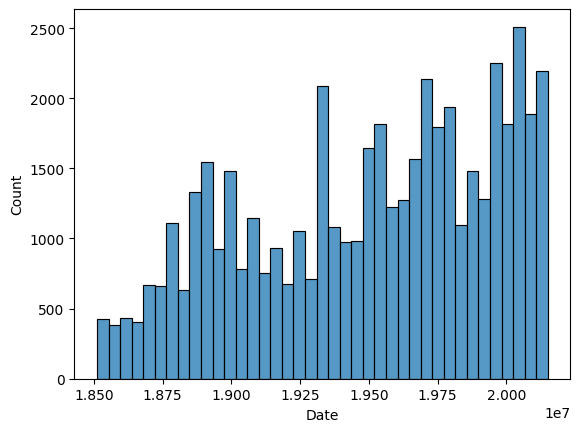

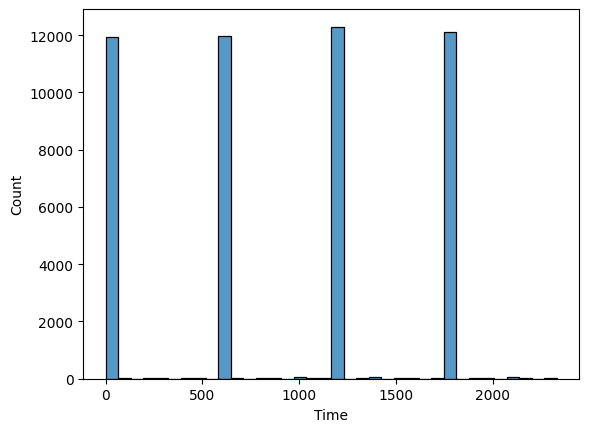

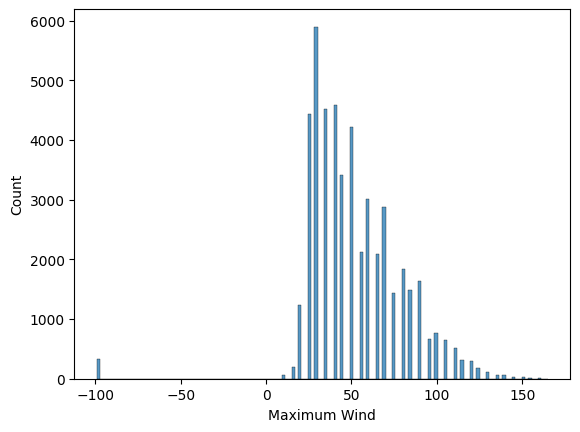

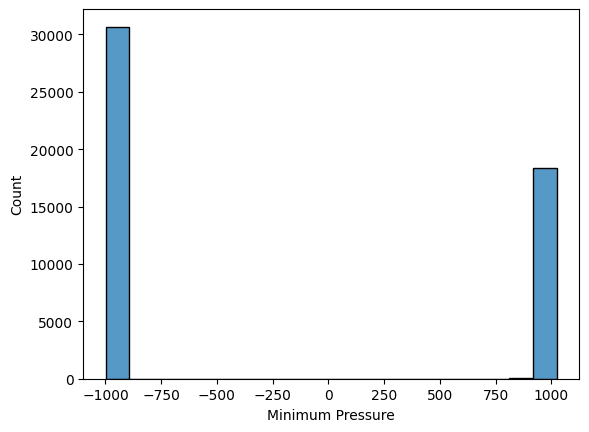

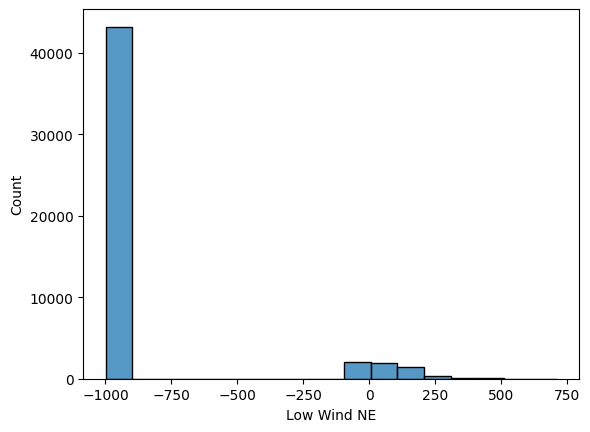

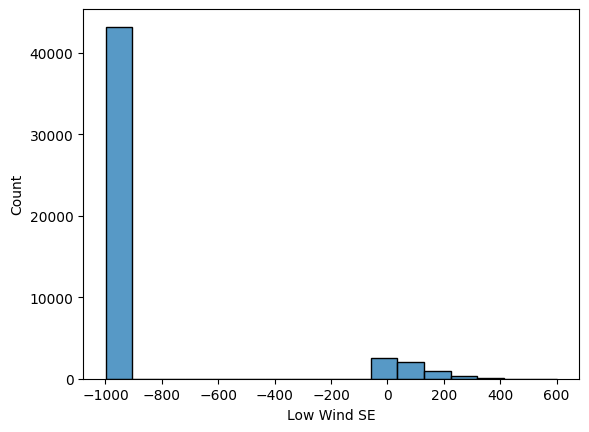

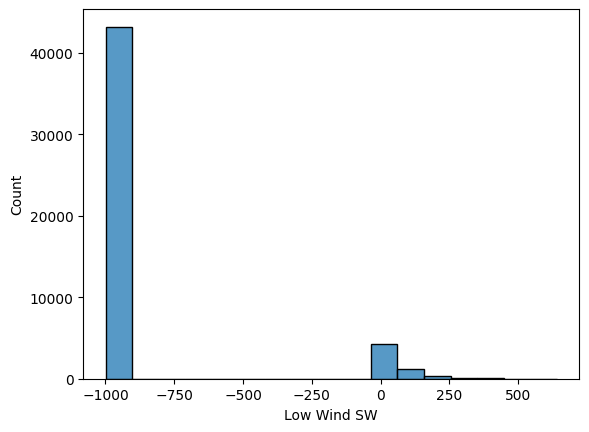

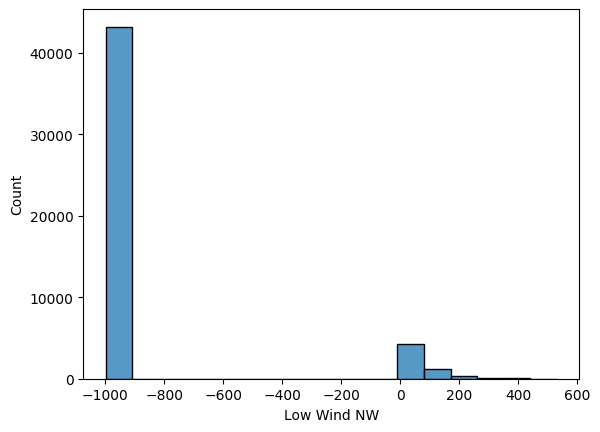

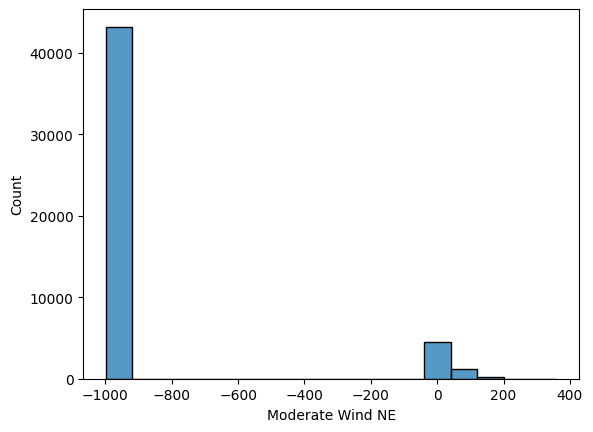

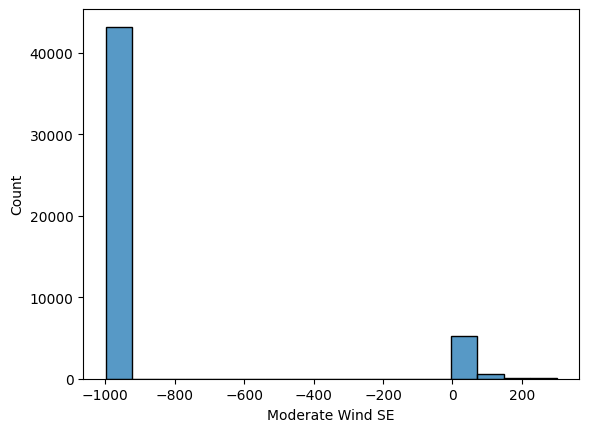

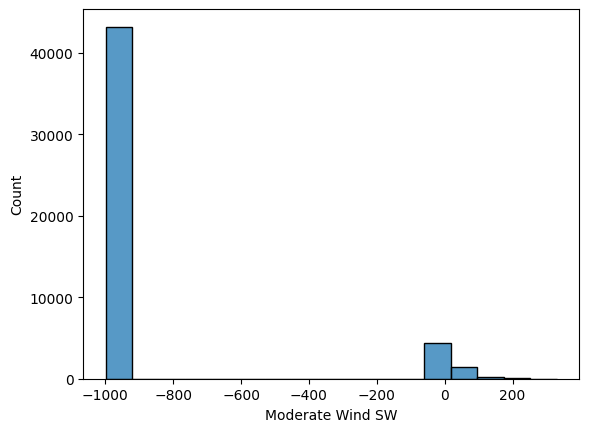

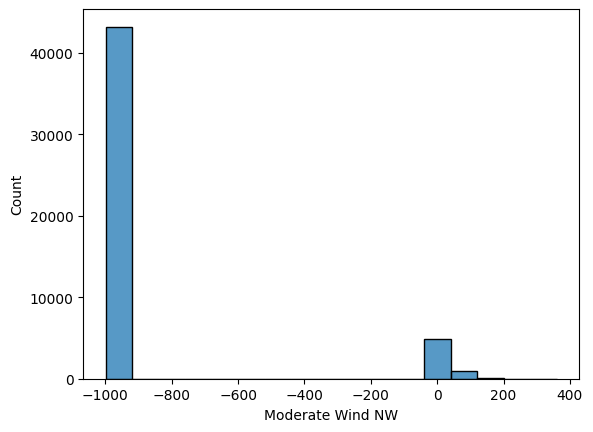

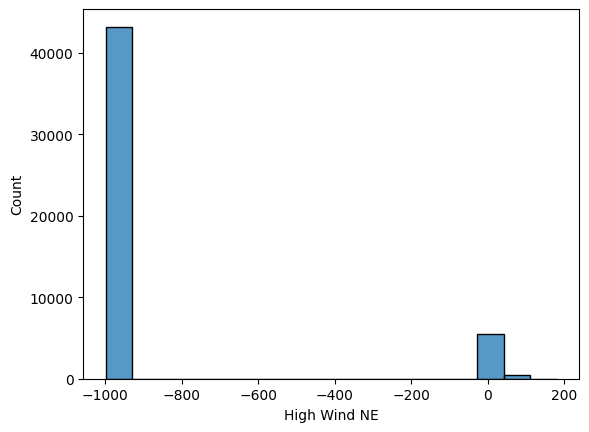

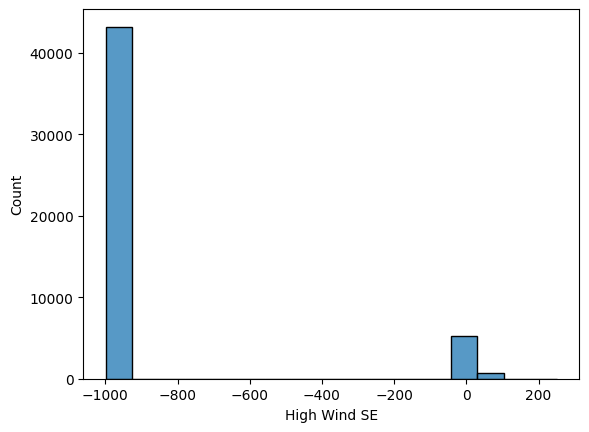

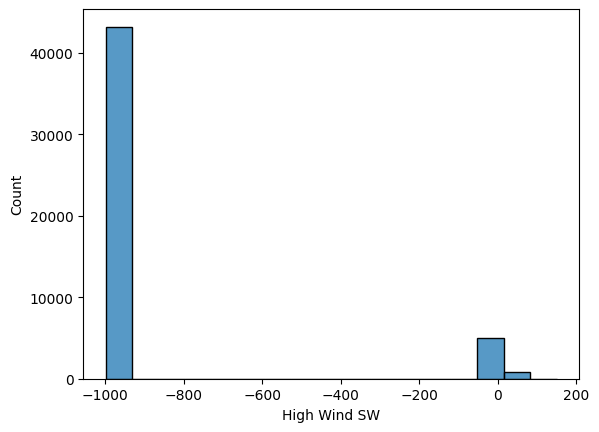

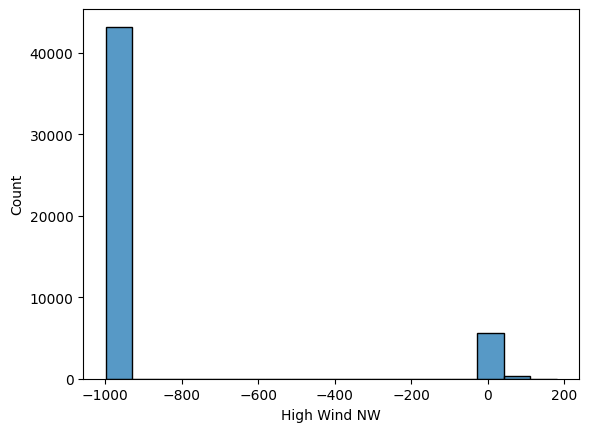

In [ ]:
for i in adata.select_dtypes(include="number").columns:
    sns.histplot(data=adata,x=i)
    plt.show()


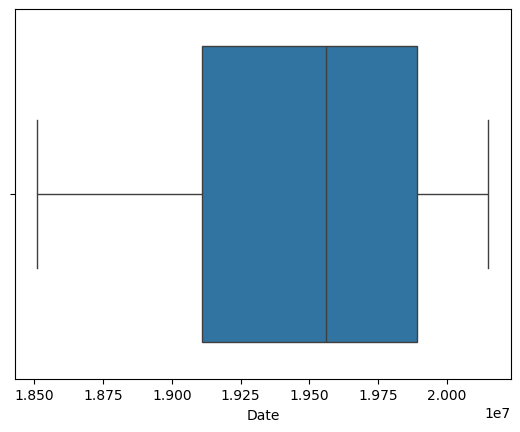

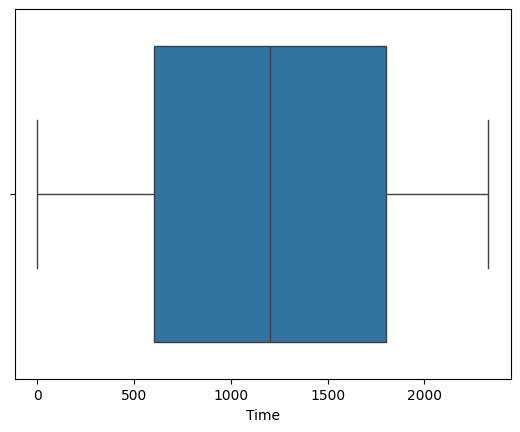

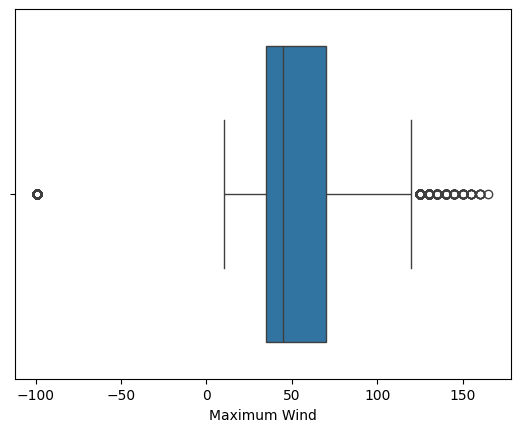

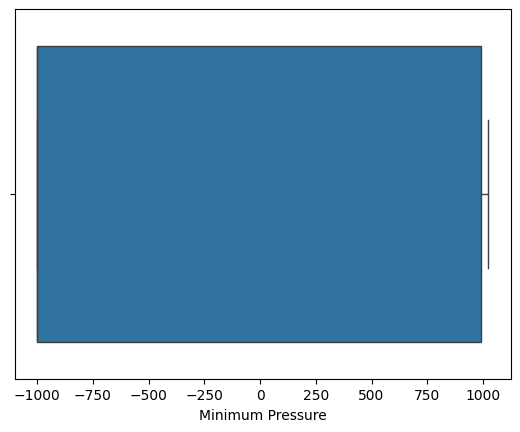

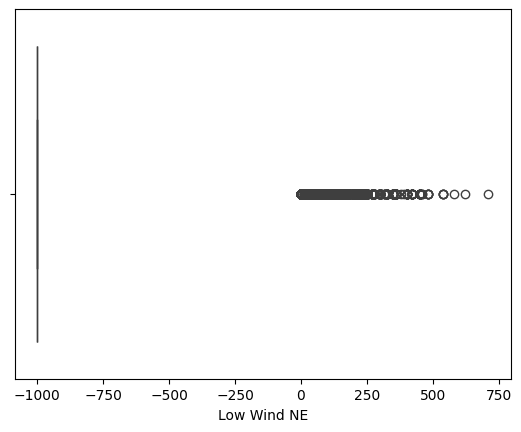

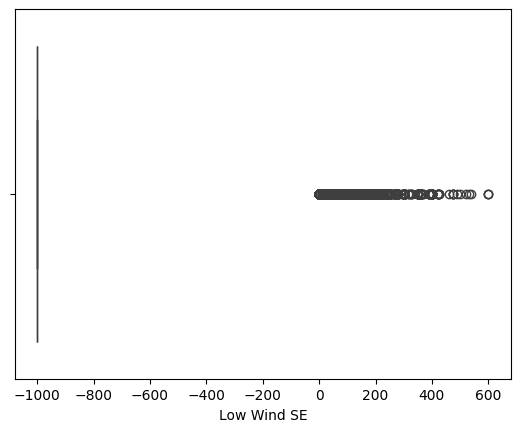

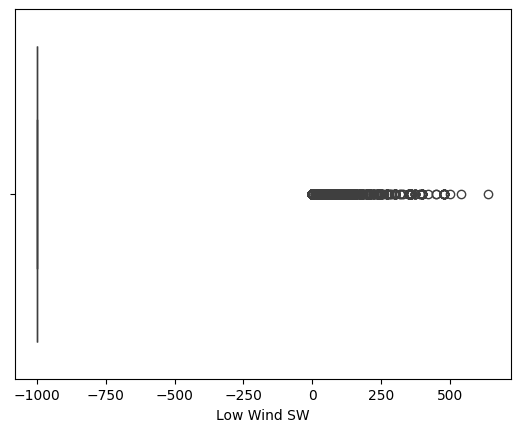

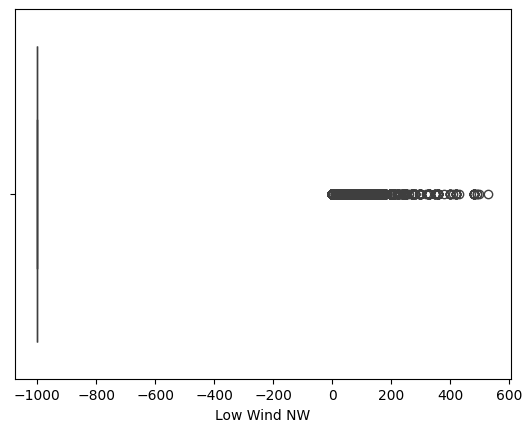

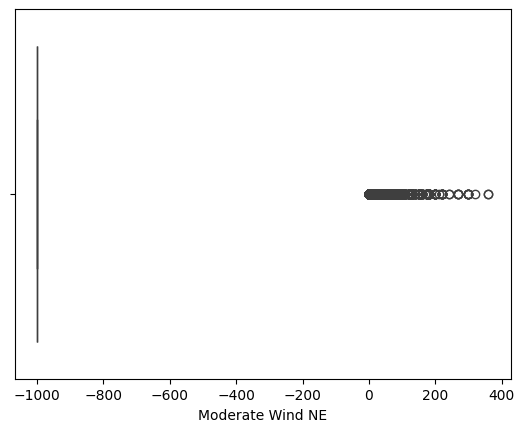

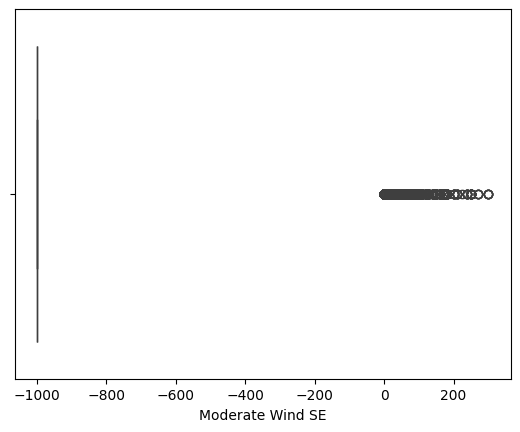

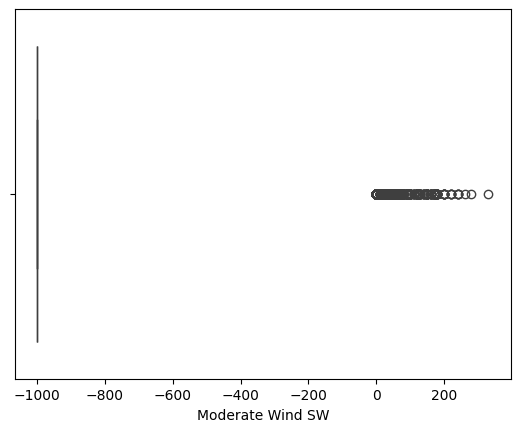

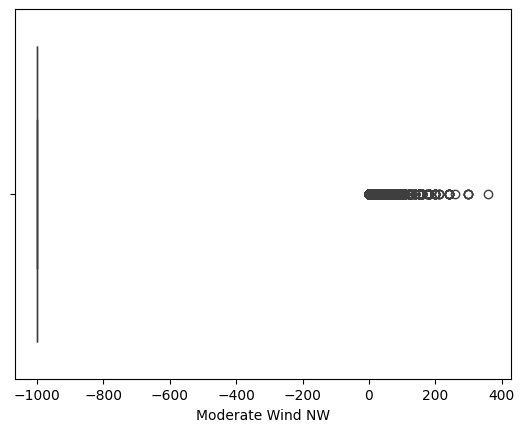

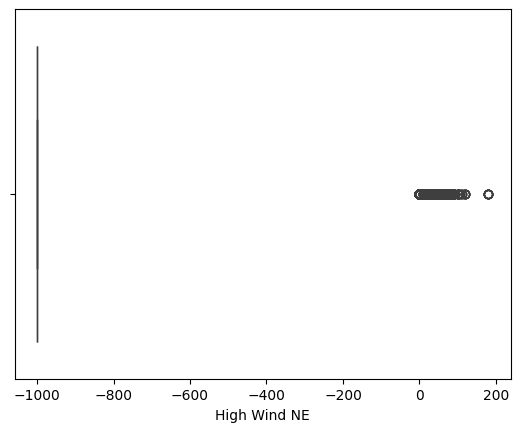

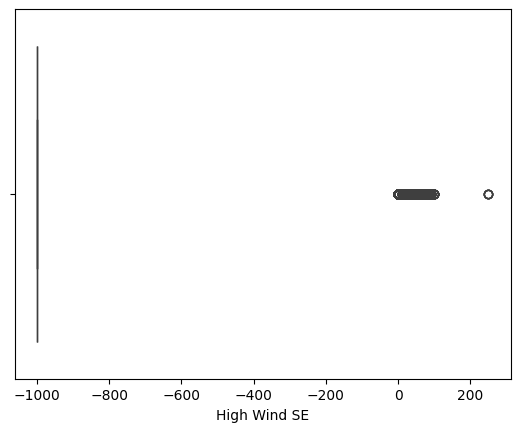

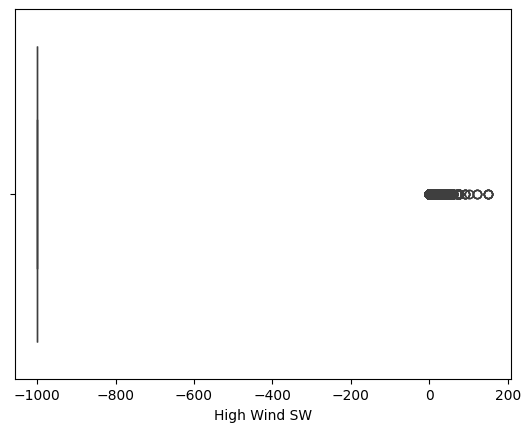

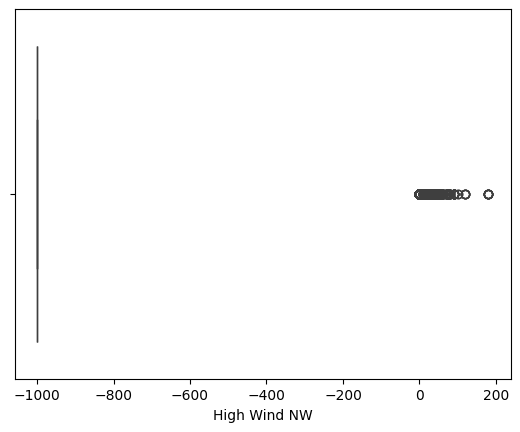

In [ ]:
for i in adata.select_dtypes(include="number").columns:
    sns.boxplot(data=adata,x=i)
    plt.show()

In [ ]:
adata.select_dtypes(include="number").columns


Index(['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

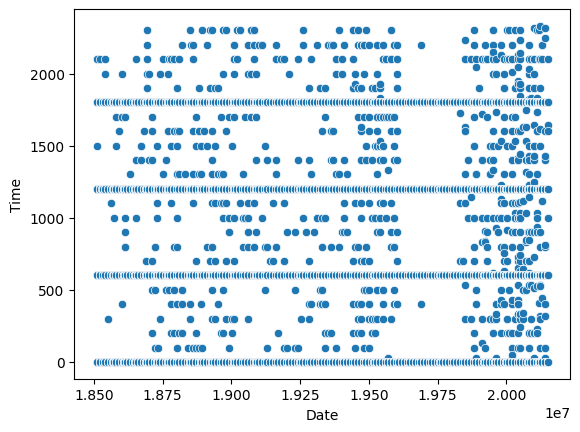

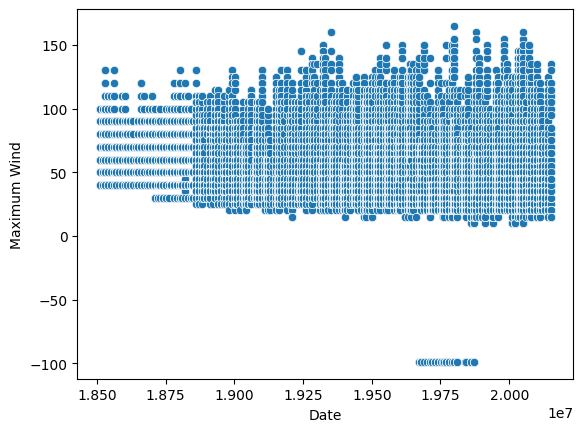

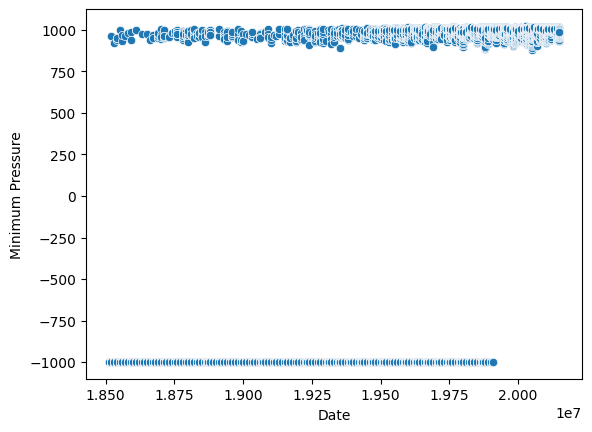

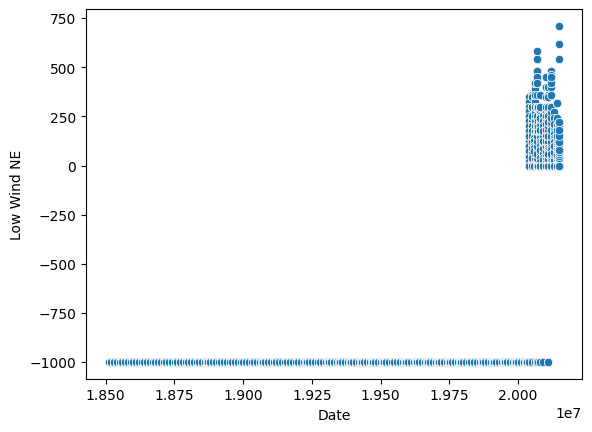

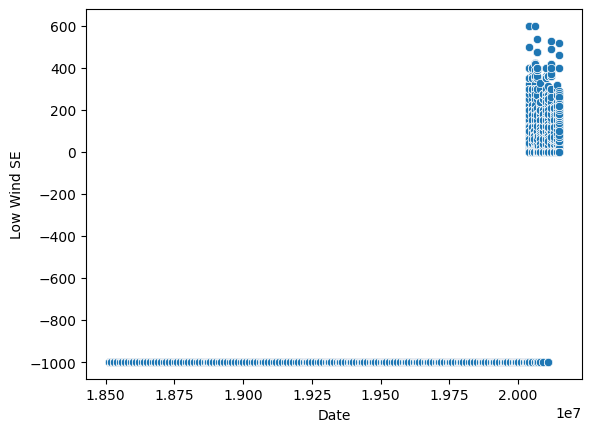

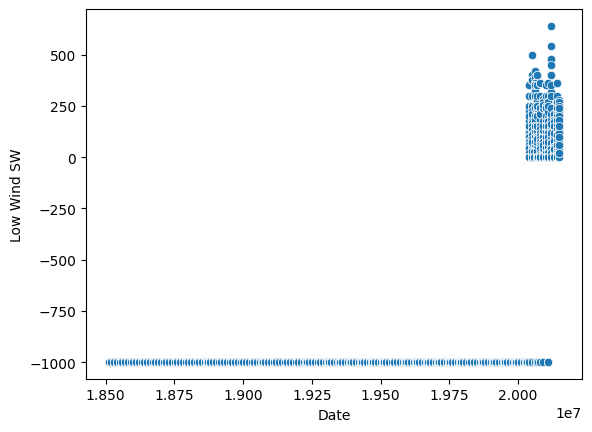

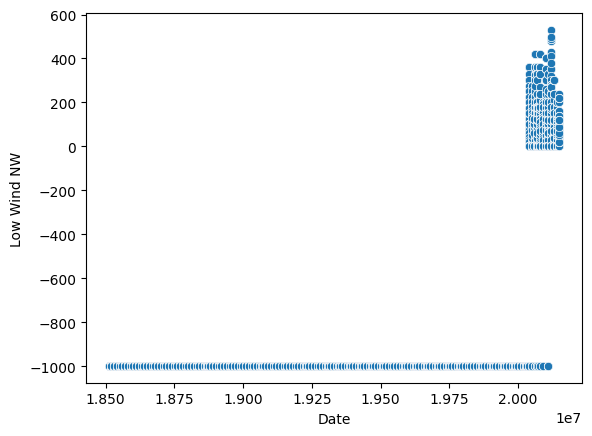

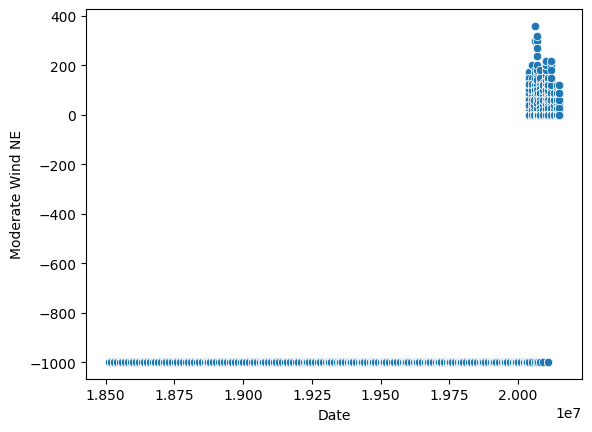

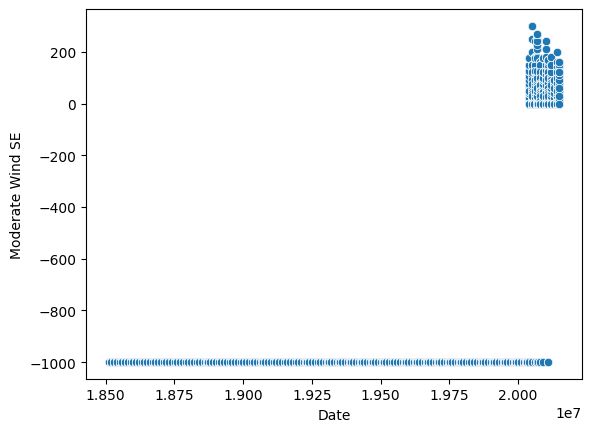

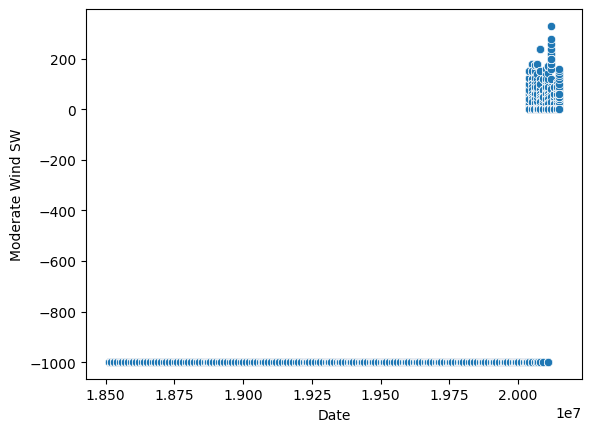

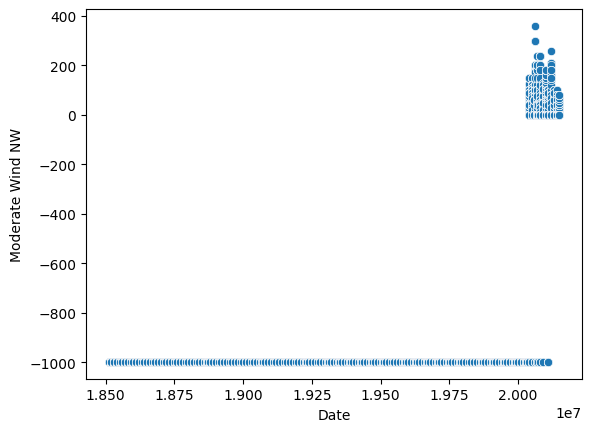

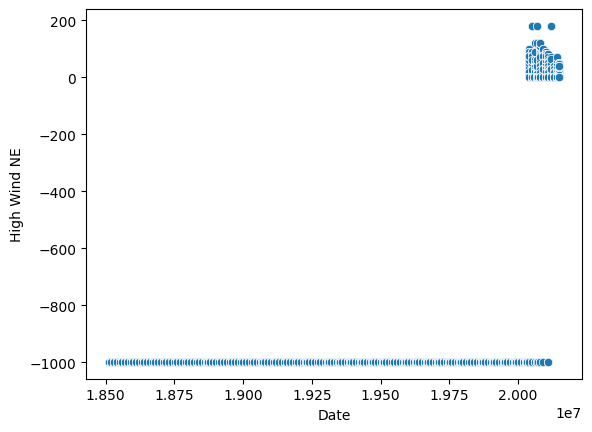

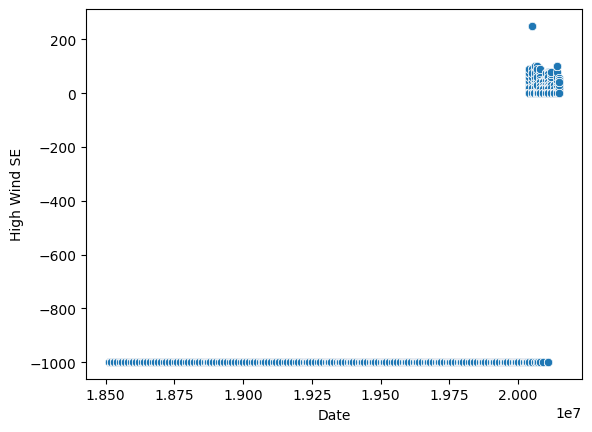

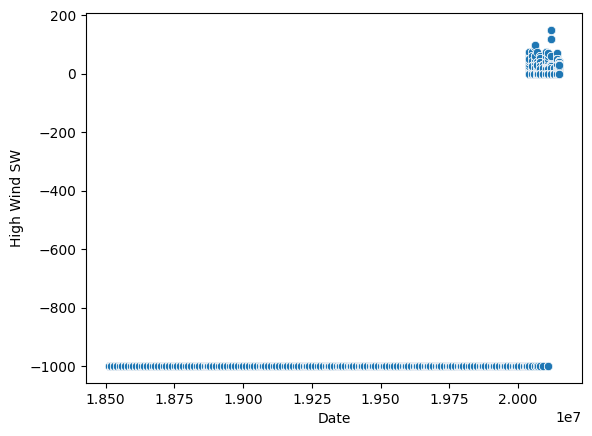

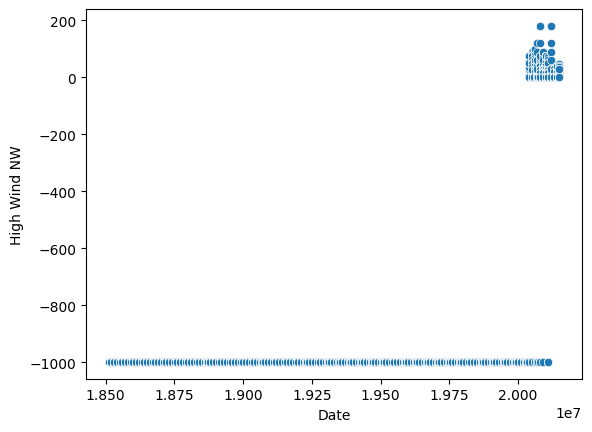

In [ ]:
for i in [ 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']:
       sns.scatterplot(data=adata,y=i,x='Date')
       plt.show()

drawing a correlation matrix of atlantic hurricane data to better understand the dataset

In [ ]:
adata_numeric = adata.select_dtypes(include=['number'])
correlation_matrix = adata_numeric.corr()
print(correlation_matrix)

                      Date      Time  Maximum Wind  Minimum Pressure  \
Date              1.000000  0.001195     -0.220613          0.723695   
Time              0.001195  1.000000     -0.005017          0.022164   
Maximum Wind     -0.220613 -0.005017      1.000000          0.010246   
Minimum Pressure  0.723695  0.022164      0.010246          1.000000   
Low Wind NE       0.489625 -0.003209     -0.036039          0.476048   
Low Wind SE       0.489646 -0.002986     -0.037226          0.476046   
Low Wind SW       0.490028 -0.003384     -0.039726          0.476488   
Low Wind NW       0.489972 -0.003364     -0.037769          0.476418   
Moderate Wind NE  0.490979 -0.003282     -0.041661          0.477528   
Moderate Wind SE  0.490990 -0.003275     -0.042496          0.477523   
Moderate Wind SW  0.491214 -0.003326     -0.044822          0.477764   
Moderate Wind NW  0.491101 -0.003324     -0.043316          0.477684   
High Wind NE      0.491380 -0.003330     -0.046199          0.47

In [ ]:
ad=adata.select_dtypes(include="number").corr()

plotting a heatmap

<Axes: >

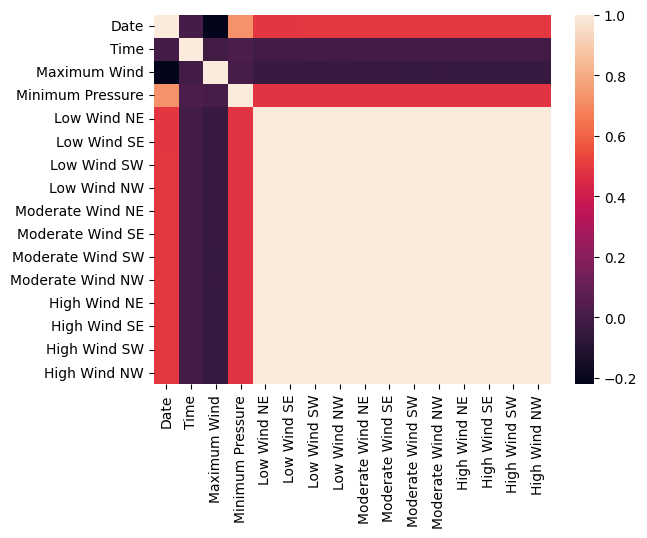

In [ ]:
sns.heatmap(ad)

<Axes: >

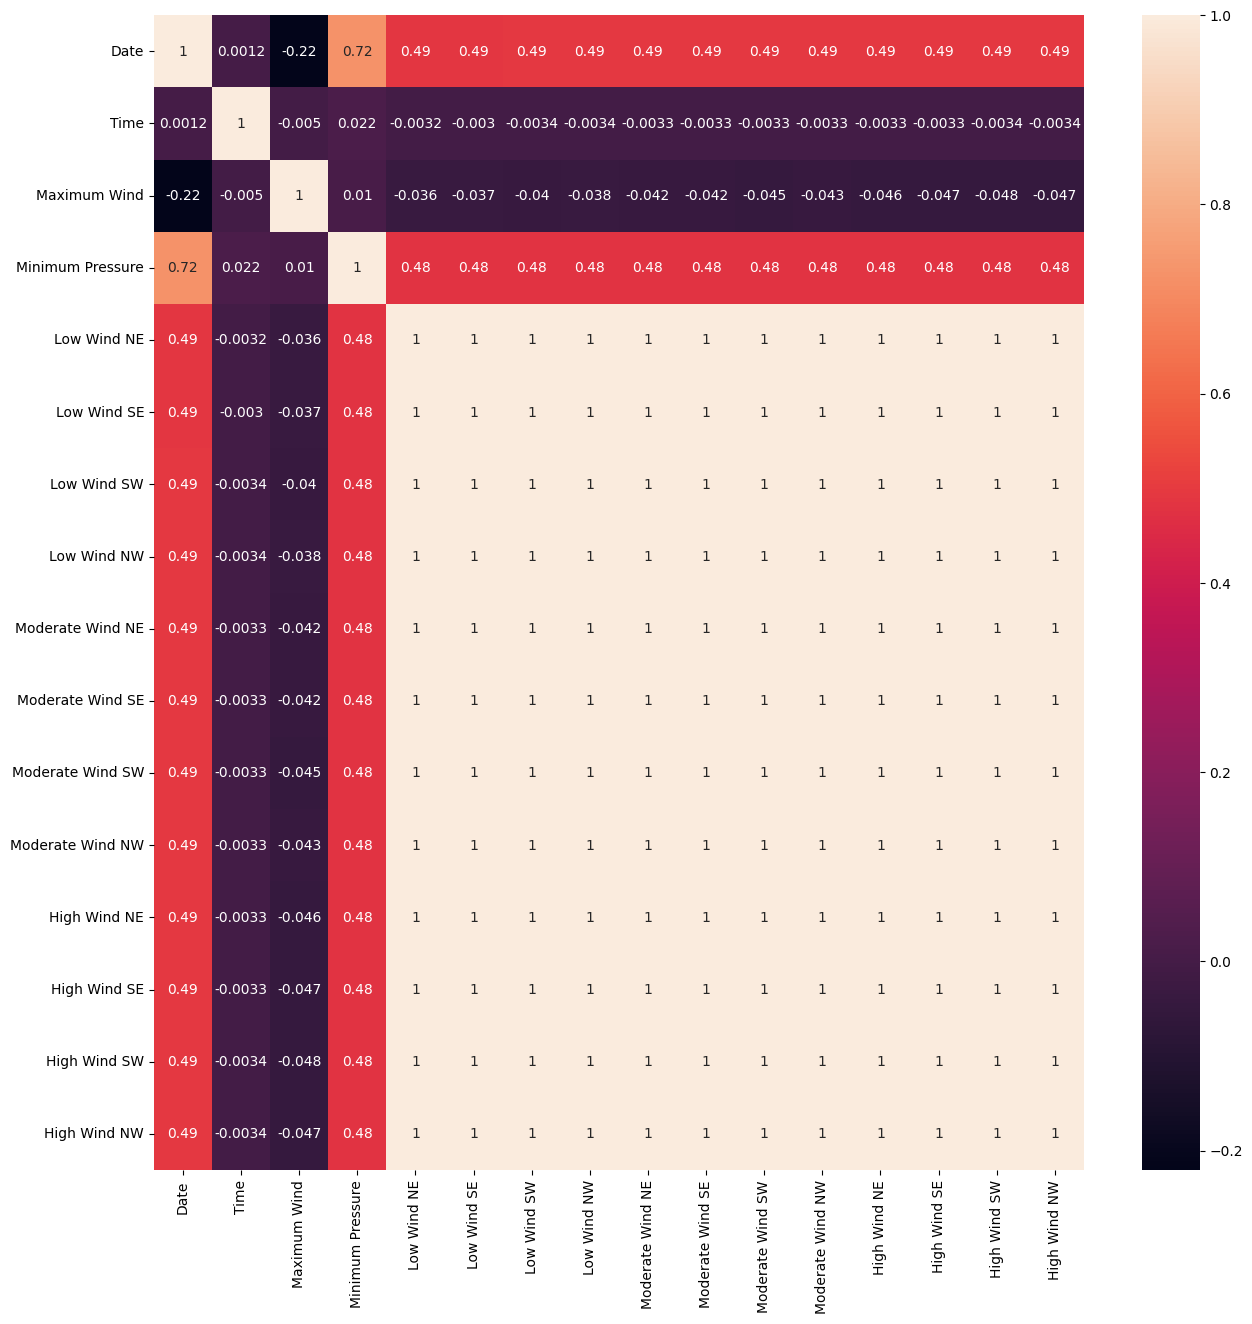

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(ad,annot=True)

In [ ]:
adata.isnull().sum()

,0
ID,0
Name,0
Date,0
Time,0
Event,0
Status,0
Latitude,0
Longitude,0
Maximum Wind,0
Minimum Pressure,0


Pre Processing Pacific Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pacific.csv to pacific.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pdata=pd.read_csv("pacific.csv")
pdata.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
pdata.tail()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0
26136,EP222015,SANDRA,20151129,1200,,LO,24.2N,107.7W,20,1010,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pdata.shape

(26137, 22)

In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [ ]:
pdata.isnull().sum()

,0
ID,0
Name,0
Date,0
Time,0
Event,0
Status,0
Latitude,0
Longitude,0
Maximum Wind,0
Minimum Pressure,0


checking for any duplicates

In [ ]:
pdata.duplicated().sum()

0

In [ ]:
for i in pdata.select_dtypes(include="object").columns:
  print(pdata[i].value_counts())
  print("****"*10)

ID
EP101994    121
EP091997     99
EP221992     98
CP051997     96
EP072014     87
           ... 
EP071957      4
EP081956      4
CP021984      4
EP202006      3
EP231989      1
Name: count, Length: 1050, dtype: int64
****************************************
Name
            UNNAMED    2180
           FERNANDA     318
               JOHN     295
            ESTELLE     293
             DANIEL     292
                       ... 
             XAVIER       6
IONE 1                    5
              PILAR       5
               MOKE       4
             TWENTY       3
Name: count, Length: 267, dtype: int64
****************************************
Event
     26035
L       90
I        6
S        3
T        3
Name: count, dtype: int64
****************************************
Status
TS     10076
TD      6965
HU      6765
LO      1828
DB       217
ET       152
EX       110
SS         7
PT         6
ST         6
SD         4
HU         1
Name: count, dtype: int64
******************************

In [ ]:
pdata.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,18.176225,-745.064851,-746.312125,-748.290929,-746.320542,-751.604622,-752.094923,-752.701917,-752.102957,-753.584382,-753.787160,-754.046945,-753.774534
std,1.688455e+05,672.008065,25.334450,996.896388,447.193480,444.883379,441.232953,444.939111,435.198872,434.303796,433.202389,434.291049,431.605766,431.239618,430.773515,431.263235
min,1.949061e+07,0.000000,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.976081e+07,0.000000,30.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


plotting histograms,boxplot and scatter plots of pacific hurricane data to analyze the data info

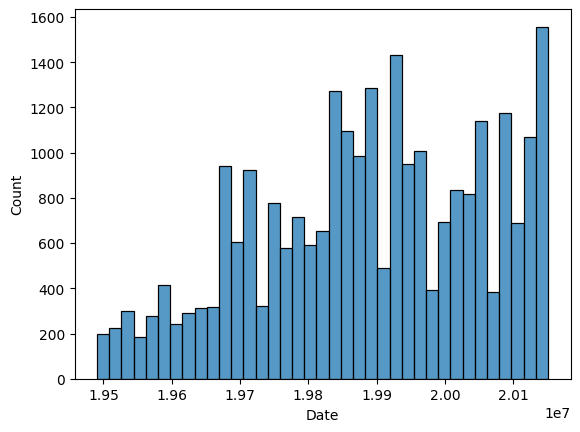

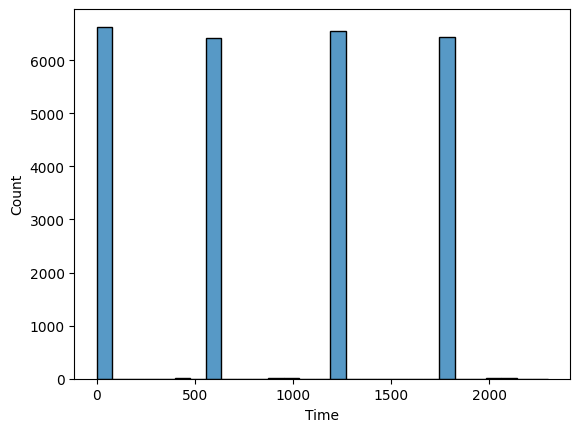

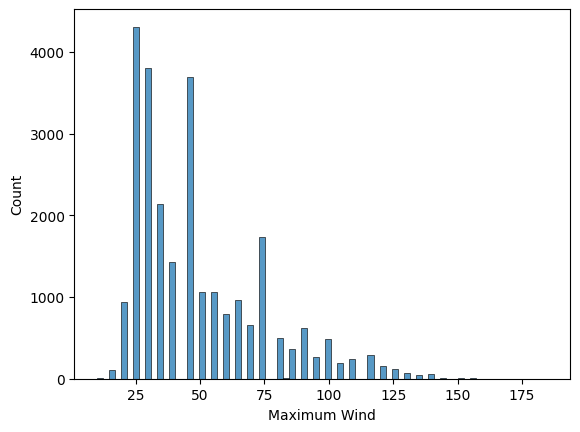

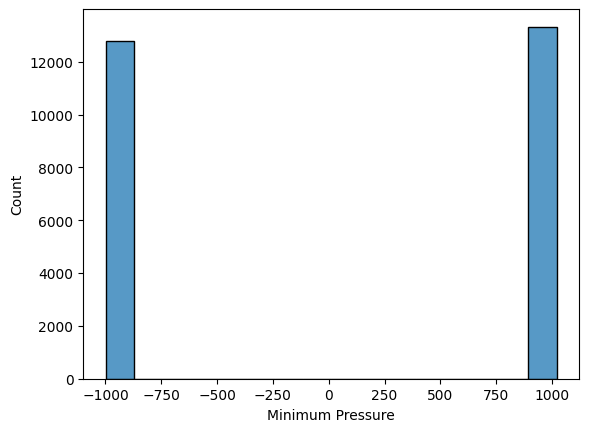

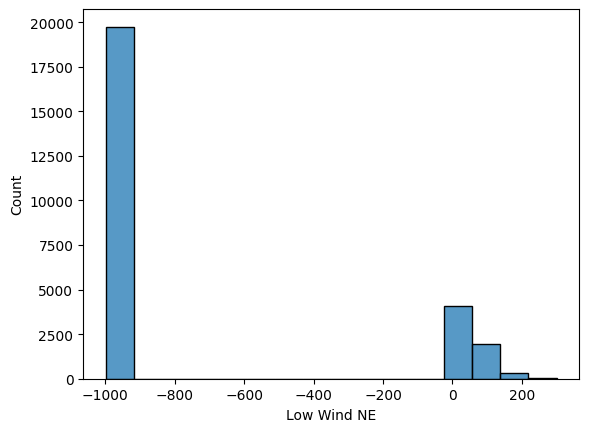

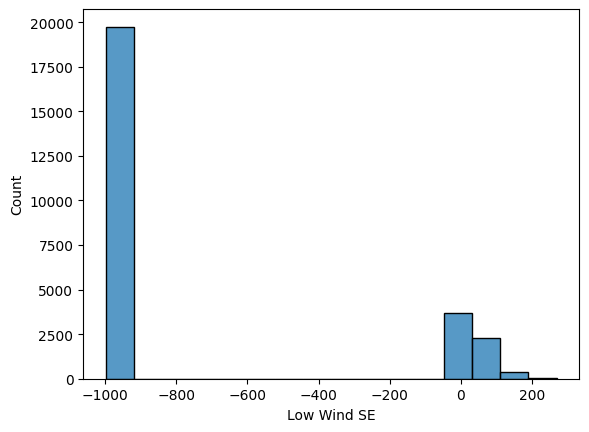

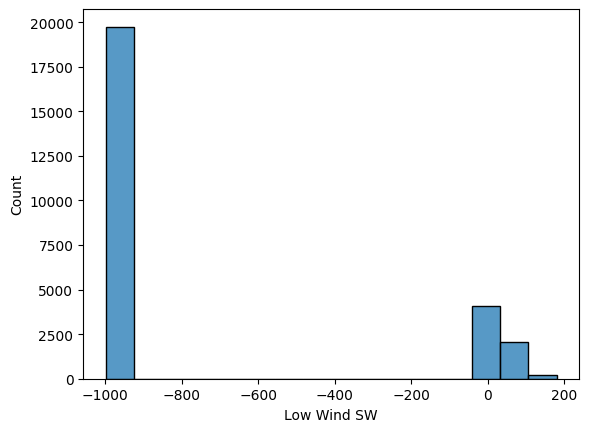

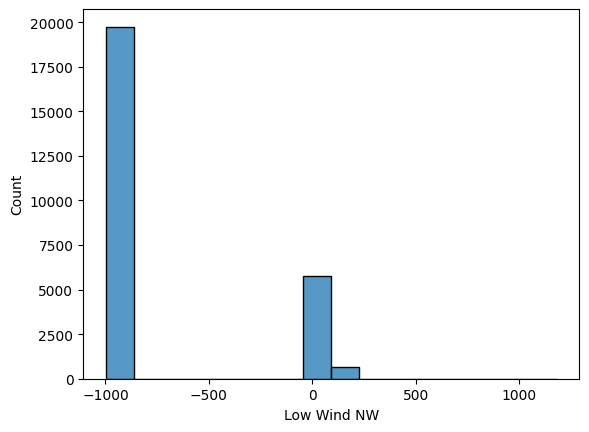

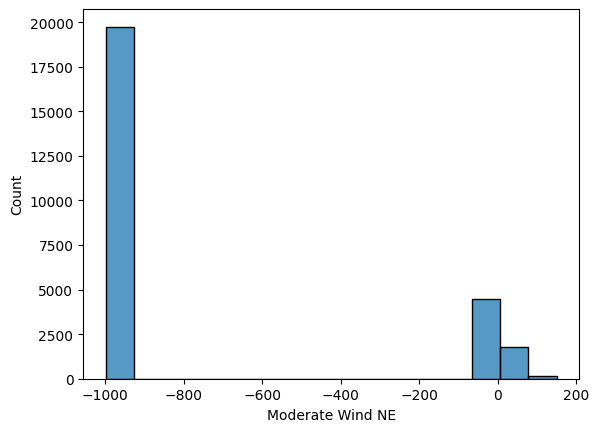

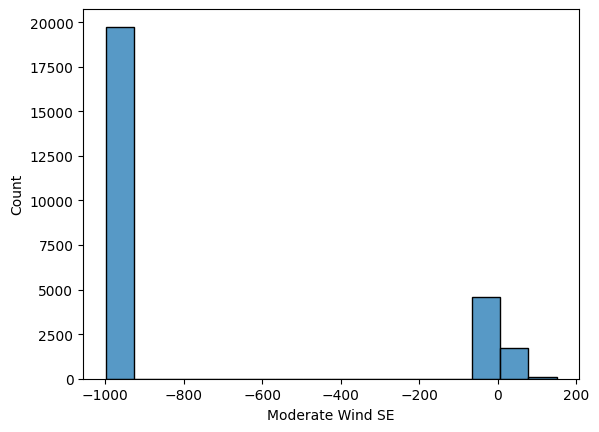

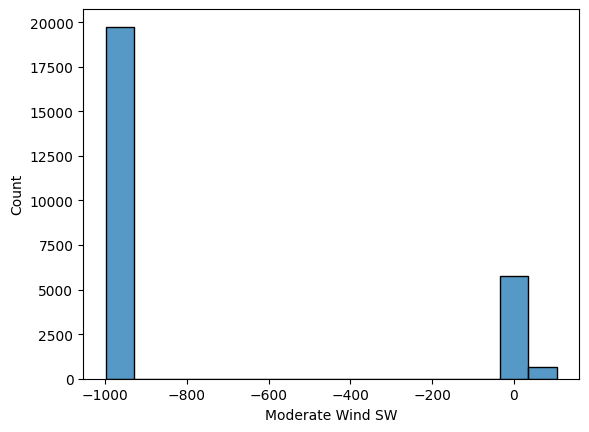

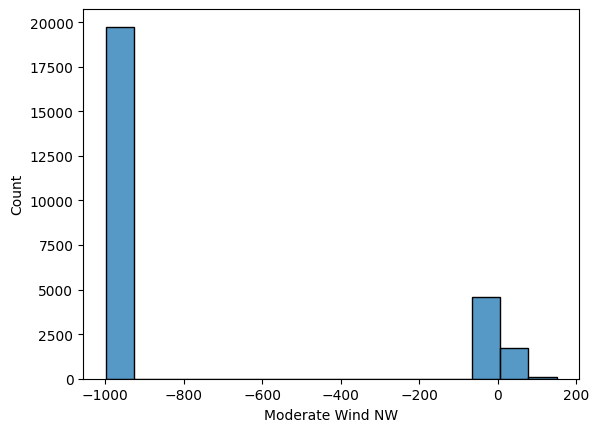

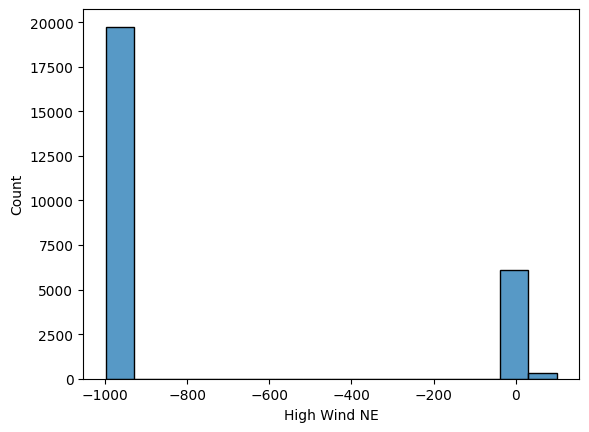

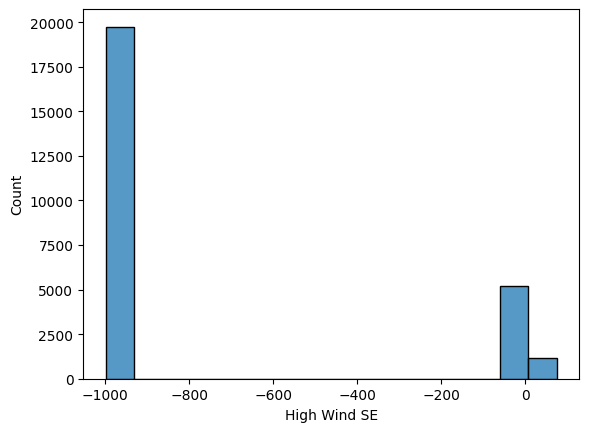

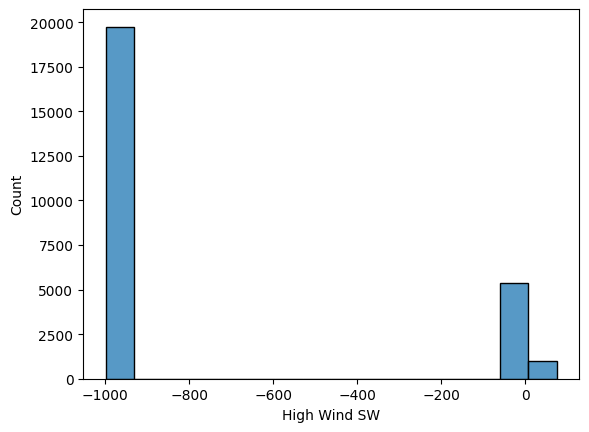

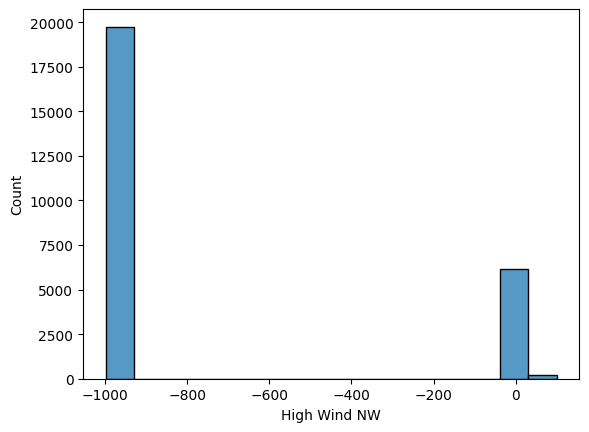

In [ ]:
for i in pdata.select_dtypes(include="number").columns:
    sns.histplot(data=pdata,x=i)
    plt.show()

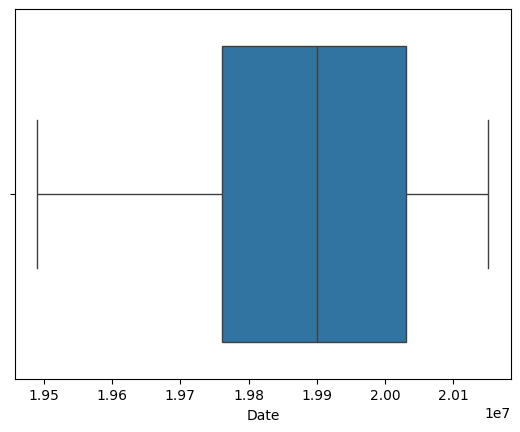

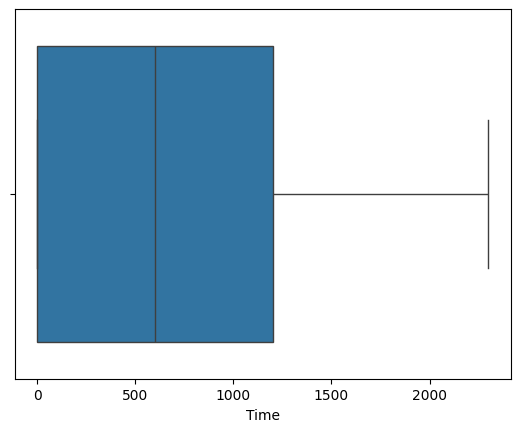

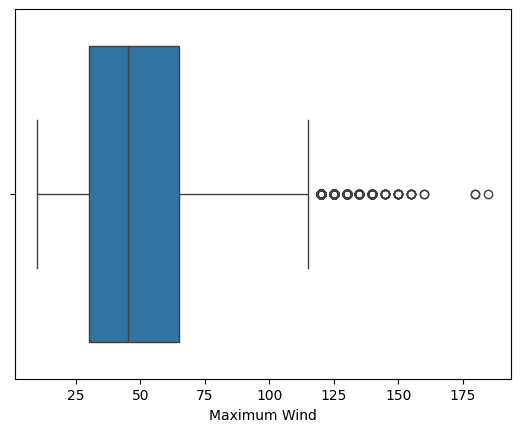

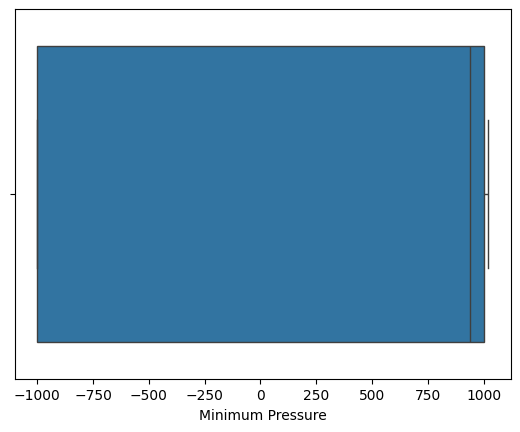

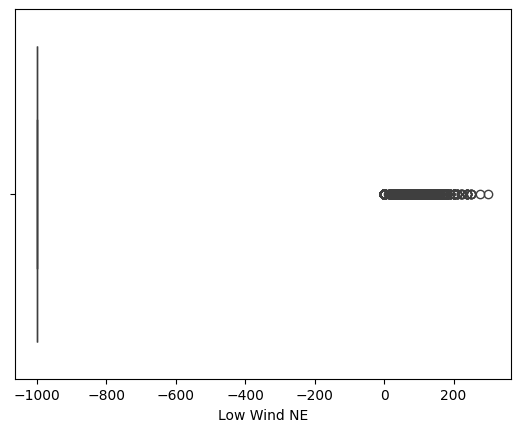

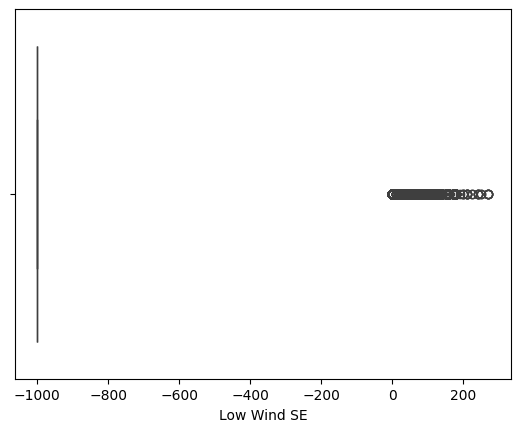

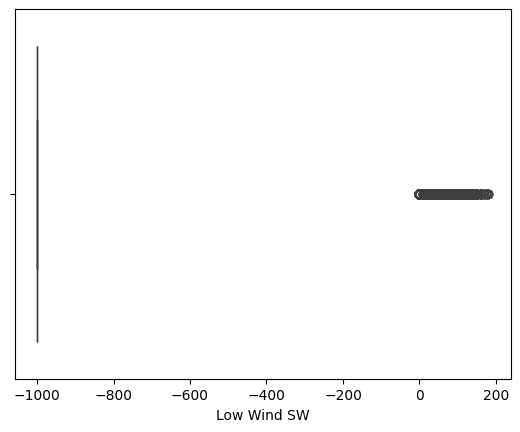

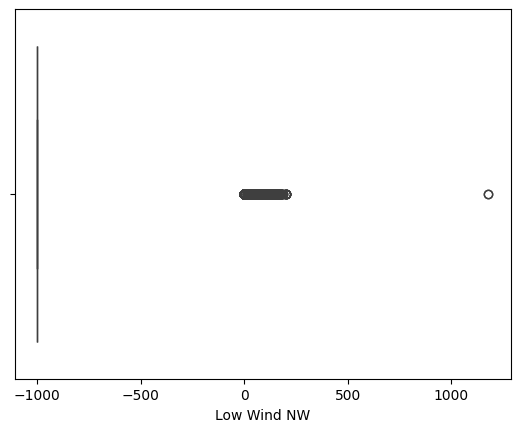

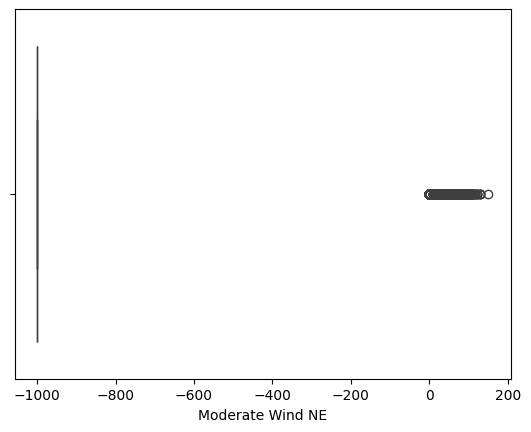

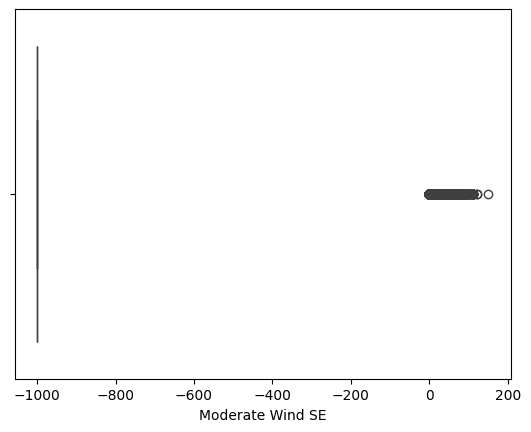

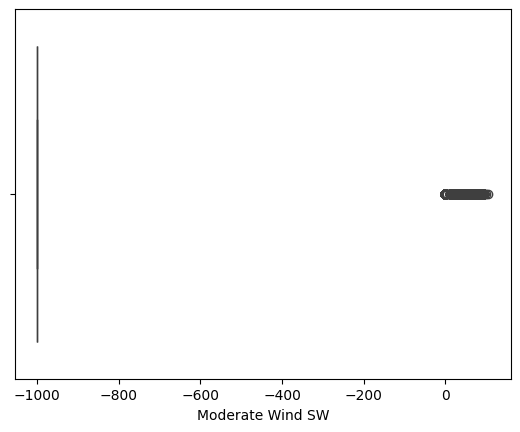

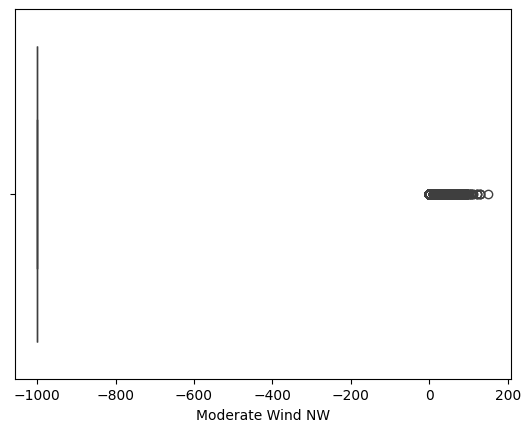

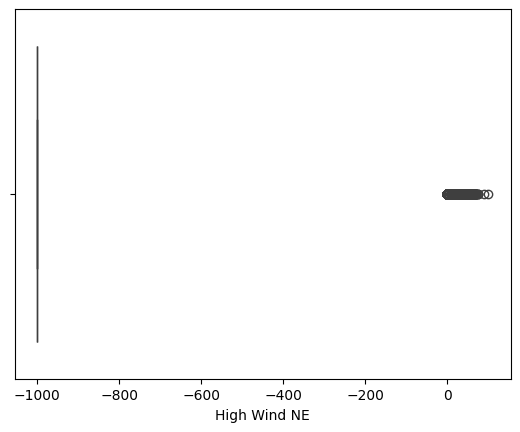

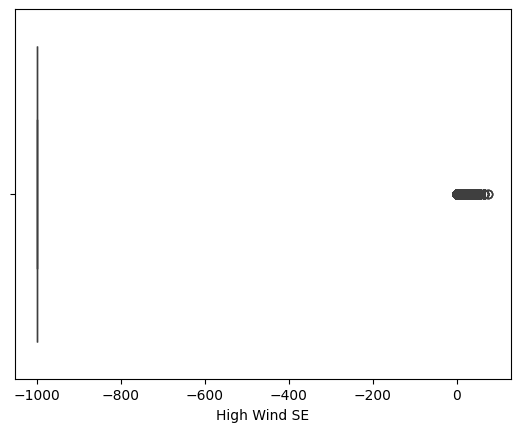

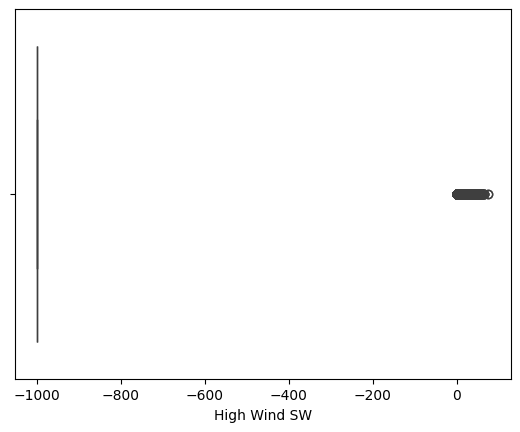

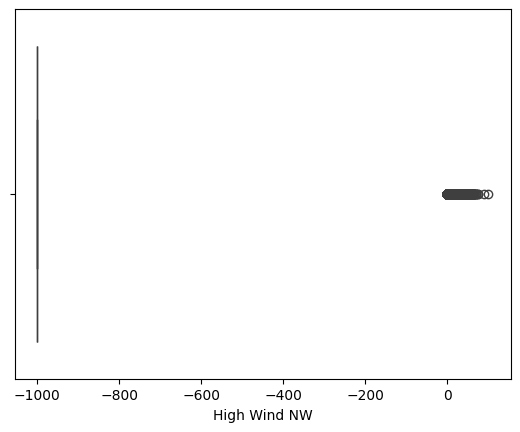

In [ ]:
for i in pdata.select_dtypes(include="number").columns:
    sns.boxplot(data=pdata,x=i)
    plt.show()

In [ ]:
pdata.select_dtypes(include="number").columns

Index(['Date', 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

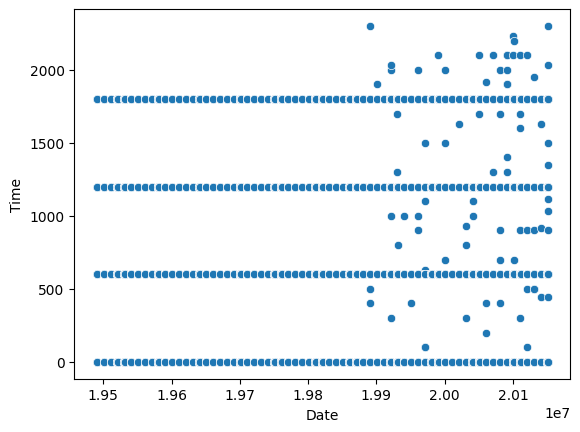

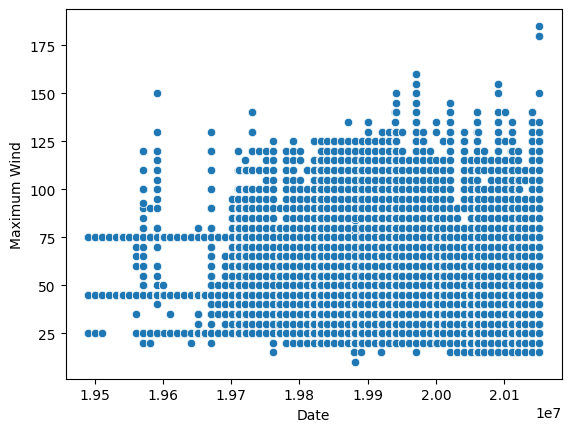

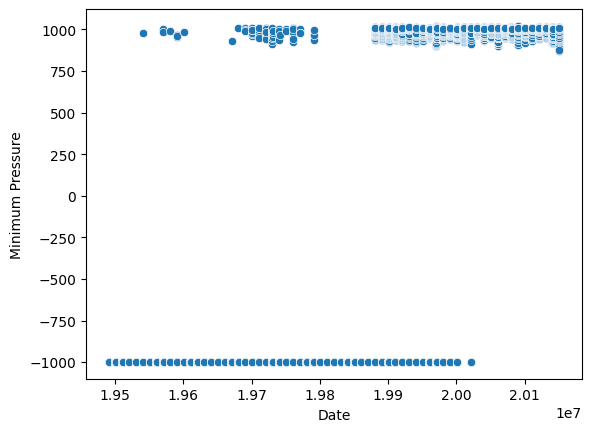

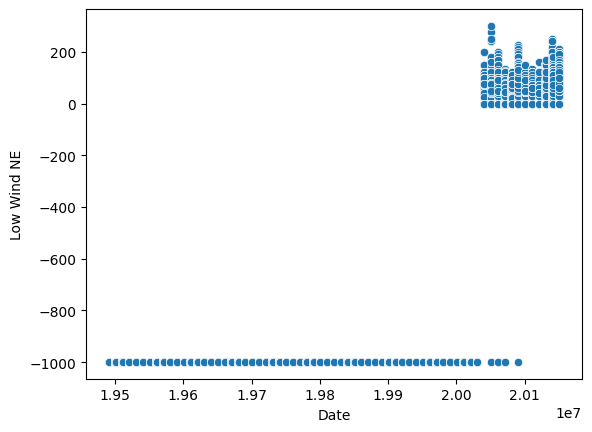

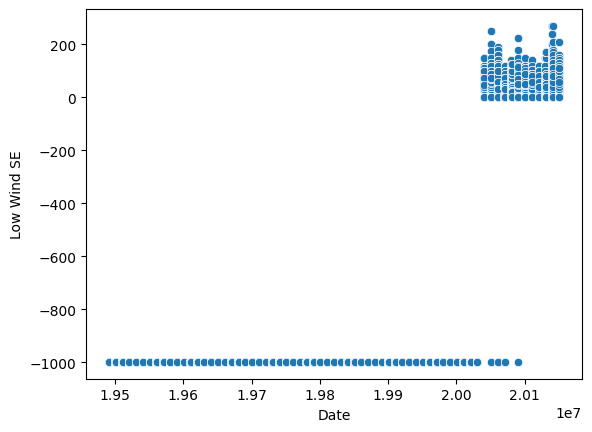

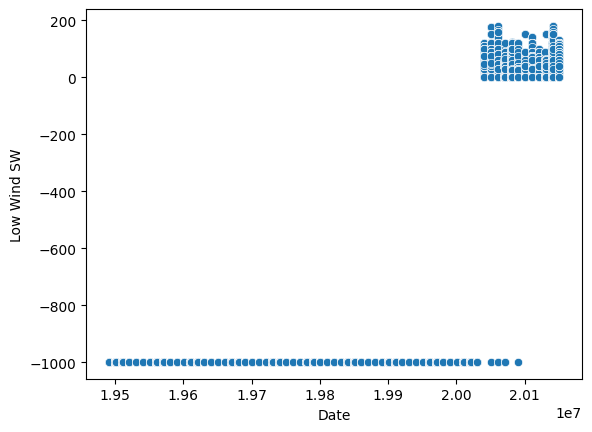

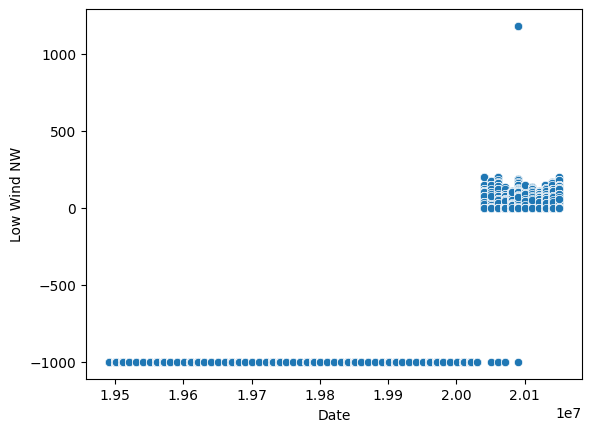

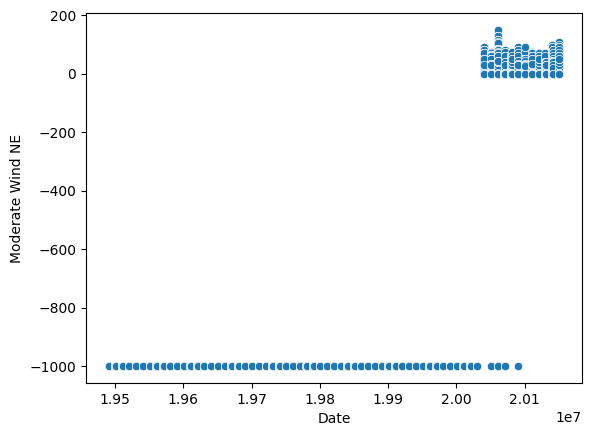

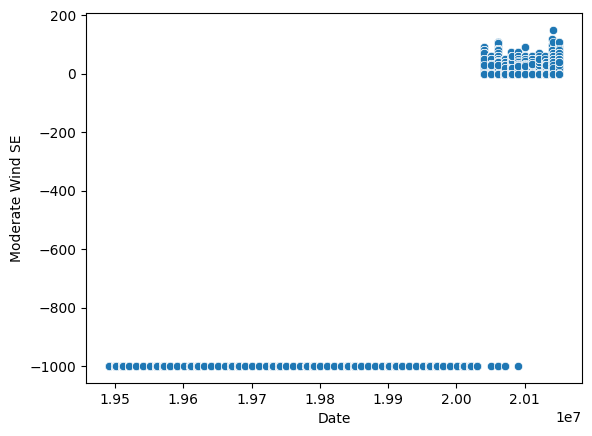

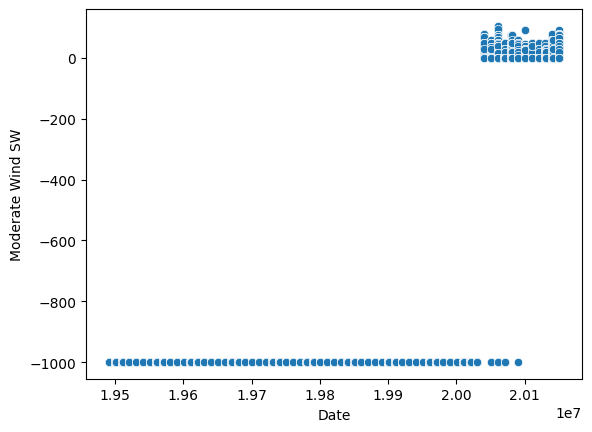

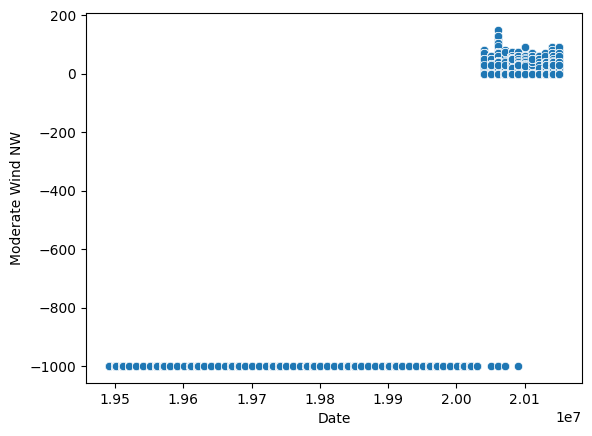

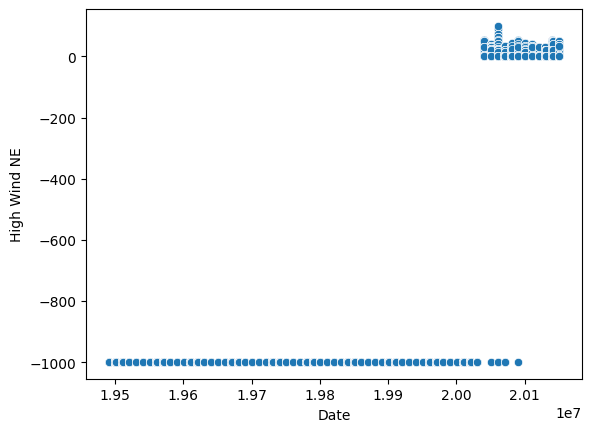

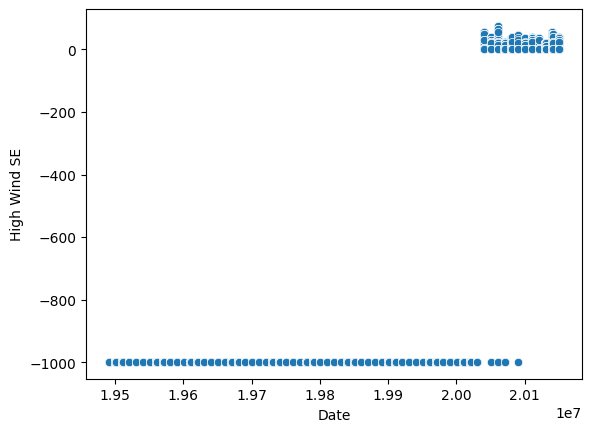

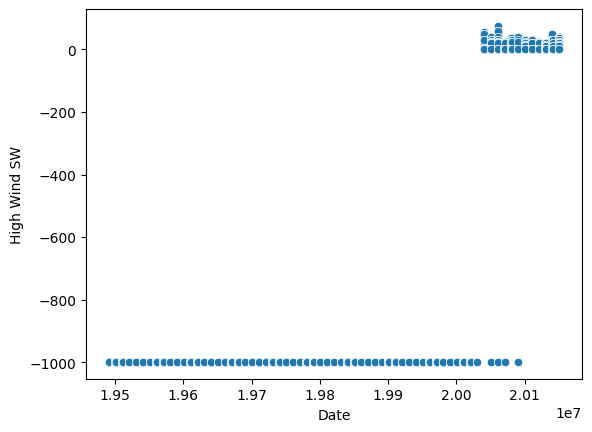

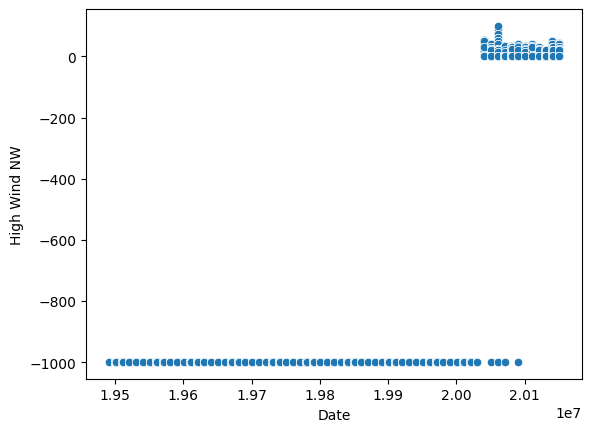

In [ ]:
for i in [ 'Time', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']:
       sns.scatterplot(data=pdata,y=i,x='Date')
       plt.show()

drawing a correlation matrix of pacific hurricane data to better understand the dataset

In [ ]:
pdata_numeric = pdata.select_dtypes(include=['number'])
correlation_matrix = pdata_numeric.corr()
print(correlation_matrix)

                      Date      Time  Maximum Wind  Minimum Pressure  \
Date              1.000000  0.012556     -0.098097          0.791700   
Time              0.012556  1.000000      0.003011          0.020606   
Maximum Wind     -0.098097  0.003011      1.000000         -0.042467   
Minimum Pressure  0.791700  0.020606     -0.042467          1.000000   
Low Wind NE       0.712189  0.005624     -0.083013          0.557156   
Low Wind SE       0.712183  0.005531     -0.084993          0.557323   
Low Wind SW       0.711943  0.005462     -0.088562          0.557587   
Low Wind NW       0.711981  0.005675     -0.085466          0.557251   
Moderate Wind NE  0.712539  0.005521     -0.092953          0.557914   
Moderate Wind SE  0.712531  0.005464     -0.094380          0.557977   
Moderate Wind SW  0.712465  0.005443     -0.096111          0.558047   
Moderate Wind NW  0.712505  0.005490     -0.094227          0.557974   
High Wind NE      0.712593  0.005426     -0.098669          0.55

In [ ]:
pd=pdata.select_dtypes(include="number").corr()

Plotting a heatmap

<Axes: >

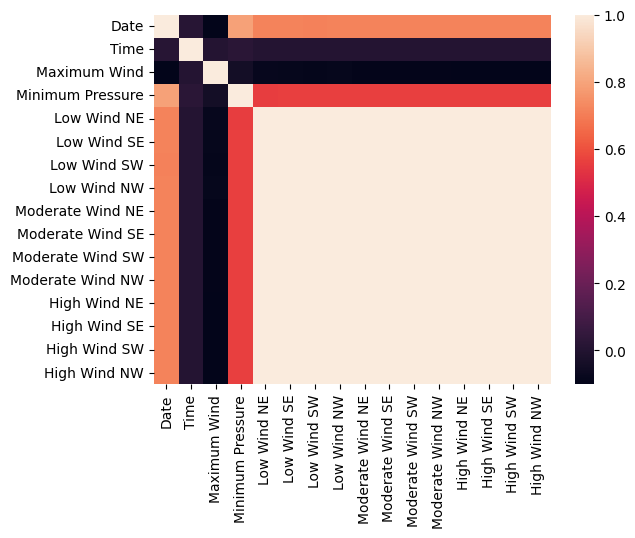

In [ ]:
sns.heatmap(pd)

<Axes: >

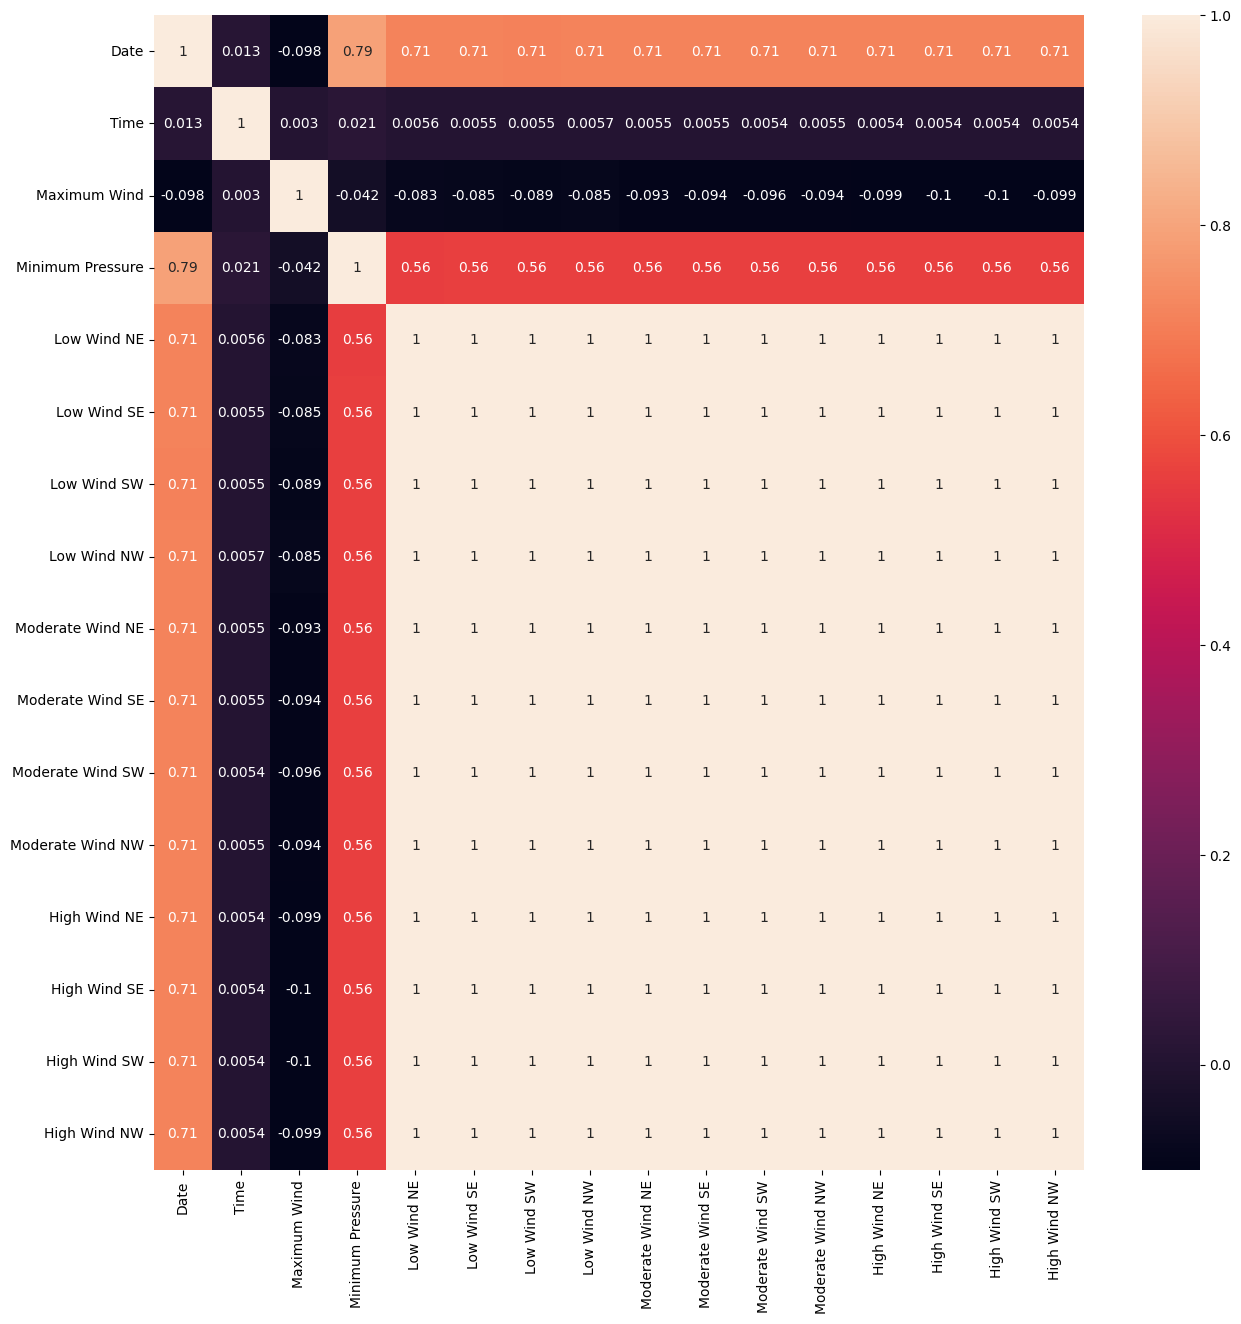

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(pd,annot=True)